In [1]:
# import libraries
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
from icecube import icetray, dataclasses, dataio, recclasses
sys.path.append('/home/ahinners/.local/lib/python3.11/site-packages')
import simweights

In [2]:
# Load in IceCube CORSIKA Simulations
#bigfilelist = '/data/sim/IceCube/2020/filtered/dst/CORSIKA-in-ice/20904'
#corsika_fl = sorted(glob.glob(f'{bigfilelist}/*/*i3*'))
#0000000-0000999
#corsika_fl = corsika_fl[:50]

In [3]:
# file provided by Jaun-Carlos
d = np.load("/data/user/juancarlos/notebooks/dst_20904_v3.npz")
print(list(d.keys()))

['nchannel', 'llhZen', 'llhAz', 'zenith', 'azimuth', 'mc_energy', 'type', 'isgoodllh', 'ndir', 'ldir', 'rlogl', 'atmosphere', 'TriggID_1006', 'cogx', 'cogy', 'cogz', 'logMuE', 'energy', 'GaisserH3a', 'Hoerandel', 'GlobalFitGST', 'GlobalSplineFit5Comp', 'GaisserH4a', 'reco_energy']


In [4]:
# Script to generate reconstructed energies

#import sys
#sys.path.append('/cvmfs/icecube.opensciencegrid.org/py3-v4.3.0/RHEL_7_x86_64/lib/python3.11/site-packages/')
#import photospline
#from photospline import glam_fit, ndsparse, bspline
#
#splineFile = '/data/user/fmcnally/anisotropy/sim/IC86_20904_hist_spline.fits'
#tab = photospline.SplineTable(splineFile)
#x = np.cos(d['zenith'])
#y = np.log10(d['nchannel'])
#
#reco_energy = []
#
#for i in range(x.size):
#
#    coord = [x[i], y[i]]
#    try:
#        centers = tab.search_centers(coord)
#        reco_energy.append(tab.evaluate(coord, centers))
#   except: 
#        reco_energy.append(-1)
#        print("Failed:",x[i], y[i],'Etrue',energy[i])
#
#d['reco_energy'] = np.array(reco_energy)

In [5]:
#fobj = {"CorsikaWeightMap": CorsikaWeightMap, "PolyplopiaPrimary": PolyplopiaPrimary}
#wobj = simweights.CorsikaWeighter(fobj, nfiles=len(corsika_fl))

In [6]:
#bins = 10**np.arange(2.5, 10, 0.25)
#plt.hist(MCenergy_corsika, bins = bins, histtype="step", weights=fluxH, label="H4a")
#plt.hist(MCenergy_corsika, bins=bins, histtype="step", weights=fluxG, label="GSF")
#plt.loglog()
#lt.legend()

In [7]:
print(np.unique(d['type']))

[      2212 1000020040 1000070140 1000130270 1000260560]


In [9]:
pcut = d['type'] == 2212
Hecut = d['type'] == 1.00002004e+09
Ncut = d['type'] == 1.000070140e+09
Alcut = d['type'] == 1.00013027e+09
Fecut =  d['type'] == 1.00026056e+09

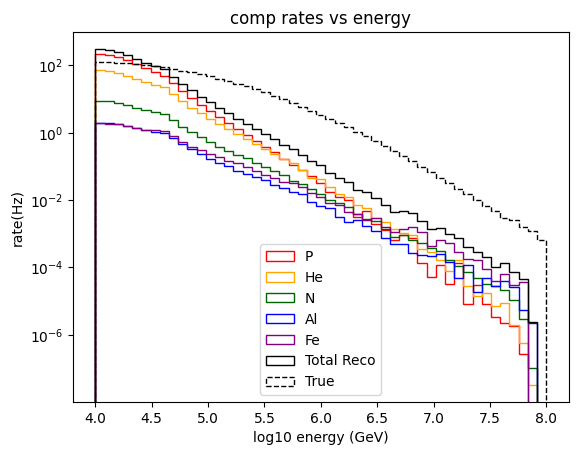

In [91]:
bins=np.linspace(4, 8, 50)

(pwtH, bins, patches1) = plt.hist(d['reco_energy'][pcut], bins = bins, log = True, weights=d['GaisserH4a'][pcut], color = 'red',histtype = 'step', label ='P')
(hwtH, bins, patches1) = plt.hist(d['reco_energy'][Hecut], bins = bins, log = True, weights=d['GaisserH4a'][Hecut],color = 'orange',histtype = 'step', label = 'He') 
(nwtH, bins, patches1) = plt.hist(d['reco_energy'][Ncut], bins = bins, log = True, weights=d['GaisserH4a'][Ncut], color='darkgreen',histtype = 'step', label = 'N')
(awtH, bins, patches1) = plt.hist(d['reco_energy'][Alcut], bins = bins, log = True, weights=d['GaisserH4a'][Alcut], color='blue',histtype = 'step', label = 'Al')
(iwtH, bins, patches1) = plt.hist(d['reco_energy'][Fecut], bins = bins, log=True, weights=d['GaisserH4a'][Fecut], color='purple', histtype='step',label='Fe')
plt.hist(d['reco_energy'], bins = bins, log = True, weights = d['GaisserH4a'], color = 'black', histtype = 'step', label = 'Total Reco')
(true, bins, patches1) = plt.hist(np.log10(d['energy']), bins = bins, log=True, weights = d['GaisserH4a'], color = 'black', histtype = 'step', label = 'True', linestyle = '--')
totH = pwtH + hwtH + nwtH + awtH + iwtH
plt.xlabel('log10 energy (GeV)')
plt.ylabel('rate(Hz)')
plt.title('comp rates vs energy')
plt.legend()
plt.show()

/tmp/ipykernel_751/673207691.py:1: RuntimeWarning: invalid value encountered in divide
  pfracH4 = pwtH / totH
/tmp/ipykernel_751/673207691.py:2: RuntimeWarning: invalid value encountered in divide
  hfracH4 = hwtH / totH
/tmp/ipykernel_751/673207691.py:3: RuntimeWarning: invalid value encountered in divide
  nfracH4 = nwtH / totH
/tmp/ipykernel_751/673207691.py:4: RuntimeWarning: invalid value encountered in divide
  afracH4 = awtH / totH
/tmp/ipykernel_751/673207691.py:5: RuntimeWarning: invalid value encountered in divide
  ifracH4 = iwtH / totH


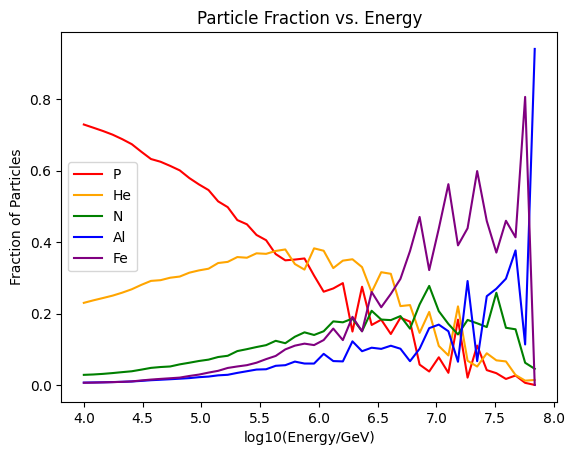

In [11]:
pfracH4 = pwtH / totH
hfracH4 = hwtH / totH
nfracH4 = nwtH / totH
afracH4 = awtH / totH
ifracH4 = iwtH / totH
plt.plot(bins[:-1], pfracH4, label = 'P', color='red')
plt.plot(bins[:-1], hfracH4, label = 'He', color='orange')
plt.plot(bins[:-1], nfracH4, label = 'N', color='green')
plt.plot(bins[:-1], afracH4, label = 'Al', color='blue')
plt.plot(bins[:-1], ifracH4, label = 'Fe', color='purple')

plt.xlabel('log10(Energy/GeV)')
plt.ylabel('Fraction of Particles')
plt.title('Particle Fraction vs. Energy')

plt.legend()

/tmp/ipykernel_751/704114600.py:9: RuntimeWarning: invalid value encountered in divide
  meanZH = totZ / totH


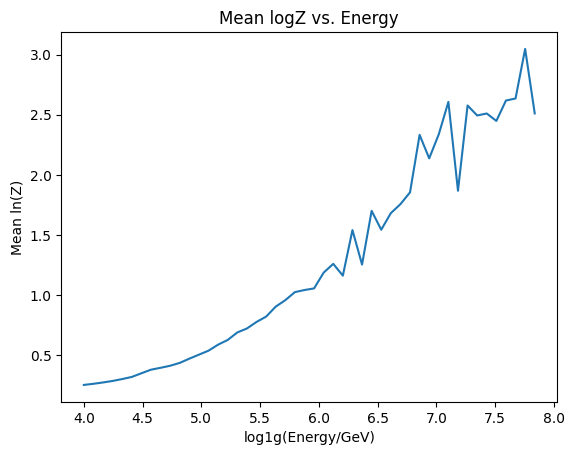

In [12]:
# Mean Atomic Charge (without dictionary)

PZ = pwtH * np.log(1)
HeZ = hwtH * np.log(2)
NZ = nwtH * np.log(7)
AlZ = awtH * np.log(13)
FeZ = iwtH * np.log(26)
totZ = PZ + HeZ + NZ + AlZ + FeZ
meanZH = totZ / totH
Mean_logZ_H4b = plt.plot(bins[:-1], meanZH)
plt.xlabel('log10(Energy/GeV)')
plt.ylabel('Mean ln(Z)')
plt.title('Mean logZ vs. Energy')
plt.show()

In [139]:
#PCOMP={
#'pCompH4': round(len(d['reco_energy'][pcut])/len(d['reco_energy']), 3),
#'hCompH4': round(len(d['reco_energy'][Hecut])/len(d['reco_energy']), 3),
#'nCompH4': round(len(d['reco_energy'][Ncut])/len(d['reco_energy']), 3),
#'aCompH4': round(len(d['reco_energy'][Alcut])/len(d['reco_energy']), 3),
#'fCompH4': round(len(d['reco_energy'][Fecut])/len(d['reco_energy']), 3)
#}

In [140]:
#print('Partial Comp: ')
#print('Proton: ' + str(PCOMP['pCompH4']))
#print('Helium: ' + str(PCOMP['hCompH4']))
#print('Nitrogen: ' + str(PCOMP['nCompH4']))
#print('Aluminum: ' + str(PCOMP['aCompH4']))
#print('Iron: ' + str(PCOMP['fCompH4']))
#print()
#print('Mean logZ: ' + str(round(np.average(meanZH[meanZH>0]),3)))

In [ ]:
#for tier, tier_cut in zip(TIERS.keys(), TIERS.values()):
#    for comp, comp_cut in zip(CUTS.keys(), CUTS.values()):
#        if not comp=='true':
#            combined_cut = comp_cut * tier_cut * quality_cut
#                
#           PCOMP[tier][comp] = round(len(primary_energy[combined_cut])/len(primary_energy[tier_cut * quality_cut]), 3)
#            AVG_RIGIDITY[tier][comp] = np.log10(np.average(primary_energy[combined_cut]/Z[comp]))
#

In [141]:
#def getEbins():
#    return [4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 6, 6.5]

In [142]:
#ebins = getEbins() + [7]
#emids = (np.asarray(ebins)[1:] + np.asarray(ebins)[:-1])/2
#print(emids)

In [122]:
BINS={
'4.125': np.logical_and(d['reco_energy'] > 4, d['reco_energy'] < 4.25),
'4.375': np.logical_and(d['reco_energy'] > 4.25, d['reco_energy'] < 4.5),
'4.625': np.logical_and(d['reco_energy'] > 4.5, d['reco_energy'] < 4.75),
'4.875': np.logical_and(d['reco_energy'] > 4.75, d['reco_energy'] < 5),
'5.125': np.logical_and(d['reco_energy'] > 5, d['reco_energy'] < 5.25),
'5.375': np.logical_and(d['reco_energy'] > 5.25, d['reco_energy'] < 5.5),
'5.75': np.logical_and(d['reco_energy'] > 5.5, d['reco_energy'] < 6),
'6.25': np.logical_and(d['reco_energy'] > 6, d['reco_energy'] < 6.5), 
'6.75': np.logical_and(d['reco_energy'] > 6.5, d['reco_energy'] < 8)
}

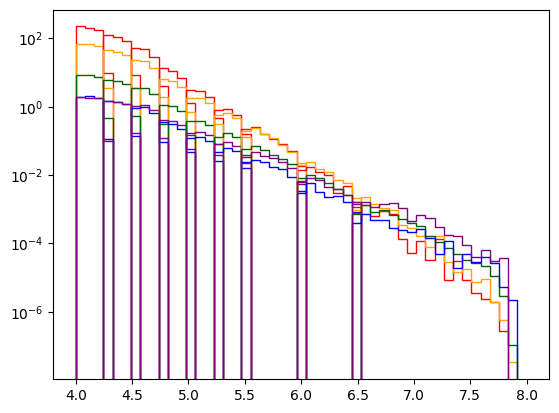

In [126]:
bins=np.linspace(4, 8, 50)
for tier in BINS:
    [p, bins, patches1] = plt.hist(d['reco_energy'][np.logical_and(BINS[tier],pcut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],pcut)], color = 'red',histtype = 'step', label ='P')
    [He, bins, patches1] = plt.hist(d['reco_energy'][np.logical_and(BINS[tier],Hecut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Hecut)], color = 'orange',histtype = 'step', label ='P')
    [N, bins, patches1] = plt.hist(d['reco_energy'][np.logical_and(BINS[tier],Ncut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Ncut)], color = 'darkgreen',histtype = 'step', label ='P')
    [Al, bins, patches1] = plt.hist(d['reco_energy'][np.logical_and(BINS[tier],Alcut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Alcut)], color = 'blue',histtype = 'step', label ='P')
    [Fe, bins, patches1] = plt.hist(d['reco_energy'][np.logical_and(BINS[tier],Fecut)], bins = bins, log = True, weights=d['GaisserH4a'][np.logical_and(BINS[tier],Fecut)], color = 'purple',histtype = 'step', label ='P')

In [138]:
print('Partial composition per energy bin')
print('-----------------------------------')
for tier in BINS:
    print('Energy bin: ' + tier)
    print('Proton: ' + str(round(len(d['reco_energy'][np.logical_and(BINS[tier],pcut)])/len(d['reco_energy'][BINS[tier]]), 3)))
    print('Helium: ' + str(round(len(d['reco_energy'][np.logical_and(BINS[tier],Hecut)])/len(d['reco_energy'][BINS[tier]]), 3)))
    print('Nitrogen: ' + str(round(len(d['reco_energy'][np.logical_and(BINS[tier],Ncut)])/len(d['reco_energy'][BINS[tier]]), 3)))
    print('Aluminum: ' + str(round(len(d['reco_energy'][np.logical_and(BINS[tier],Alcut)])/len(d['reco_energy'][BINS[tier]]), 3)))
    print('Iron: ' + str(round(len(d['reco_energy'][np.logical_and(BINS[tier],Fecut)])/len(d['reco_energy'][BINS[tier]]), 3)))
    print()

Partial composition per energy bin
-----------------------------------
Energy bin: 4.125
Proton: 0.68
Helium: 0.213
Nitrogen: 0.068
Aluminum: 0.03
Iron: 0.009

Energy bin: 4.375
Proton: 0.652
Helium: 0.223
Nitrogen: 0.079
Aluminum: 0.036
Iron: 0.011

Energy bin: 4.625
Proton: 0.601
Helium: 0.238
Nitrogen: 0.096
Aluminum: 0.048
Iron: 0.016

Energy bin: 4.875
Proton: 0.558
Helium: 0.245
Nitrogen: 0.114
Aluminum: 0.062
Iron: 0.022

Energy bin: 5.125
Proton: 0.51
Helium: 0.253
Nitrogen: 0.132
Aluminum: 0.075
Iron: 0.031

Energy bin: 5.375
Proton: 0.46
Helium: 0.26
Nitrogen: 0.149
Aluminum: 0.092
Iron: 0.039

Energy bin: 5.75
Proton: 0.409
Helium: 0.256
Nitrogen: 0.17
Aluminum: 0.113
Iron: 0.053

Energy bin: 6.25
Proton: 0.353
Helium: 0.259
Nitrogen: 0.189
Aluminum: 0.135
Iron: 0.064

Energy bin: 6.75
Proton: 0.286
Helium: 0.244
Nitrogen: 0.217
Aluminum: 0.151
Iron: 0.102

